### Exercise 01.1

1) $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> .

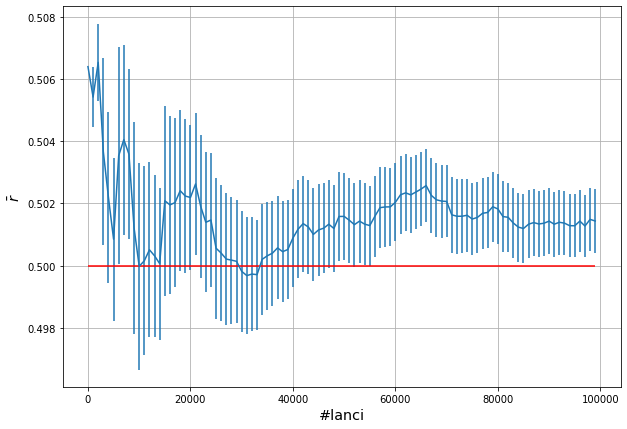

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math
from scipy import optimize

x, mean, dev_std = np.loadtxt("es01.1/es01.1_1/rmedio.txt", usecols=(0,1,2), unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,mean,yerr=dev_std)
plt.xlabel('#lanci',fontsize='x-large')
plt.ylabel(r'$\bar{r}$',fontsize='x-large')
plt.hlines(y=0.5,xmin=min(x), xmax=max(x),color='r', linestyle='-')

plt.grid(True)
plt.show()

Ho valutato l'integrale utlizzando $N=100$ numero di blocchi per un numero totale di $M=100000$ lanci. Noto dal grafico che la deviazione standard si riduce all'aumentare del numero di blocchi e il valor medio si stabilizza risultando compatibile entro $2\sigma$ con il valore atteso.

2) $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

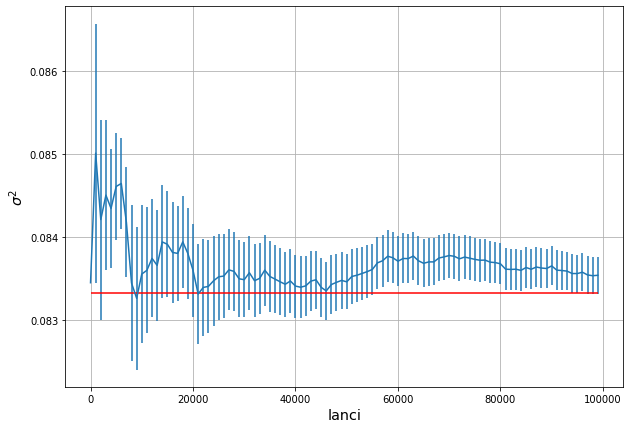

In [11]:
plt.figure(figsize=(10,7))
x, sigma, sigma_dev_std = np.loadtxt("es01.1/es01.1_2/sigmamedio.txt", usecols=(0,1,2),unpack='true')
plt.errorbar(x,sigma,yerr=sigma_dev_std)
plt.xlabel('lanci',fontsize='x-large')
plt.ylabel(r'$\sigma^{2}$',fontsize='x-large')
plt.hlines(y=1/12,xmin=min(x), xmax=max(x),color='r', linestyle='-')
plt.grid(True)
plt.show()

Anche in questo caso, l'integrale è stato valutato utlizzando $N=100$ numero di blocchi per un totale di $M=100000$ lanci. Noto dal grafico che la deviazione standard della varianza, come nel caso precedente, si riduce all'aumentare del numero di blocchi e che è compatibile con il valore atteso entro $2\sigma$.

3) Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. 

La formula per il calcolo del $\chi^2$ è:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
$n/M$ è il valore di aspettazione sui singoli sotto-intervalli in cui è stato suddiviso l'intervallo di dispersione dato che si campiona utilizzando una distribuzione uniforme. Pertanto mi aspetto che per grandi valori di $n$, in media si ottenga che $(n_i - n/M)^2 \simeq n/M$ e quindi $\chi^2 \simeq 100$, cioè il numero di sottointervalli.

37.16


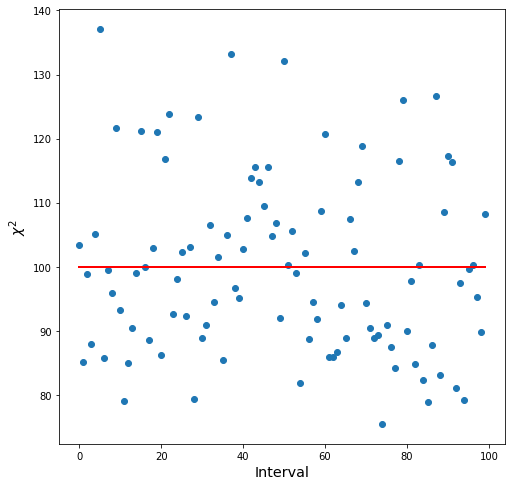

In [6]:
plt.figure(figsize=(8,8))

chi = np.loadtxt("es01.1/es01.1_3/chiquadro.txt", unpack='true')
x = np.arange(np.size(chi))
atteso=np.ones(100)*100
plt.plot(x,chi,'o')
plt.plot(x,atteso,'r',linewidth=2.0)
plt.xlabel('Interval',fontsize='x-large')
plt.ylabel(r'$\chi^{2}$',fontsize='x-large')

print(max(abs(atteso-chi)))

plt.show()

Il $\chi^2$ su ogni sottointervallo risulta  distributito attorno al valore atteso di $100$  (avendo imposto $M=100$ e $n=10^4$) con un massimo discostamento di $37.2$. Questo ci dice statisticamente che le occorenze sono estratte in maniera uniforme e che seguono la distribuzione di probabilità attesa. Quindi il Pseudo-Random generator, sebbene sia un algoritmo deterministico, genera numeri con la probabilità attesa.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

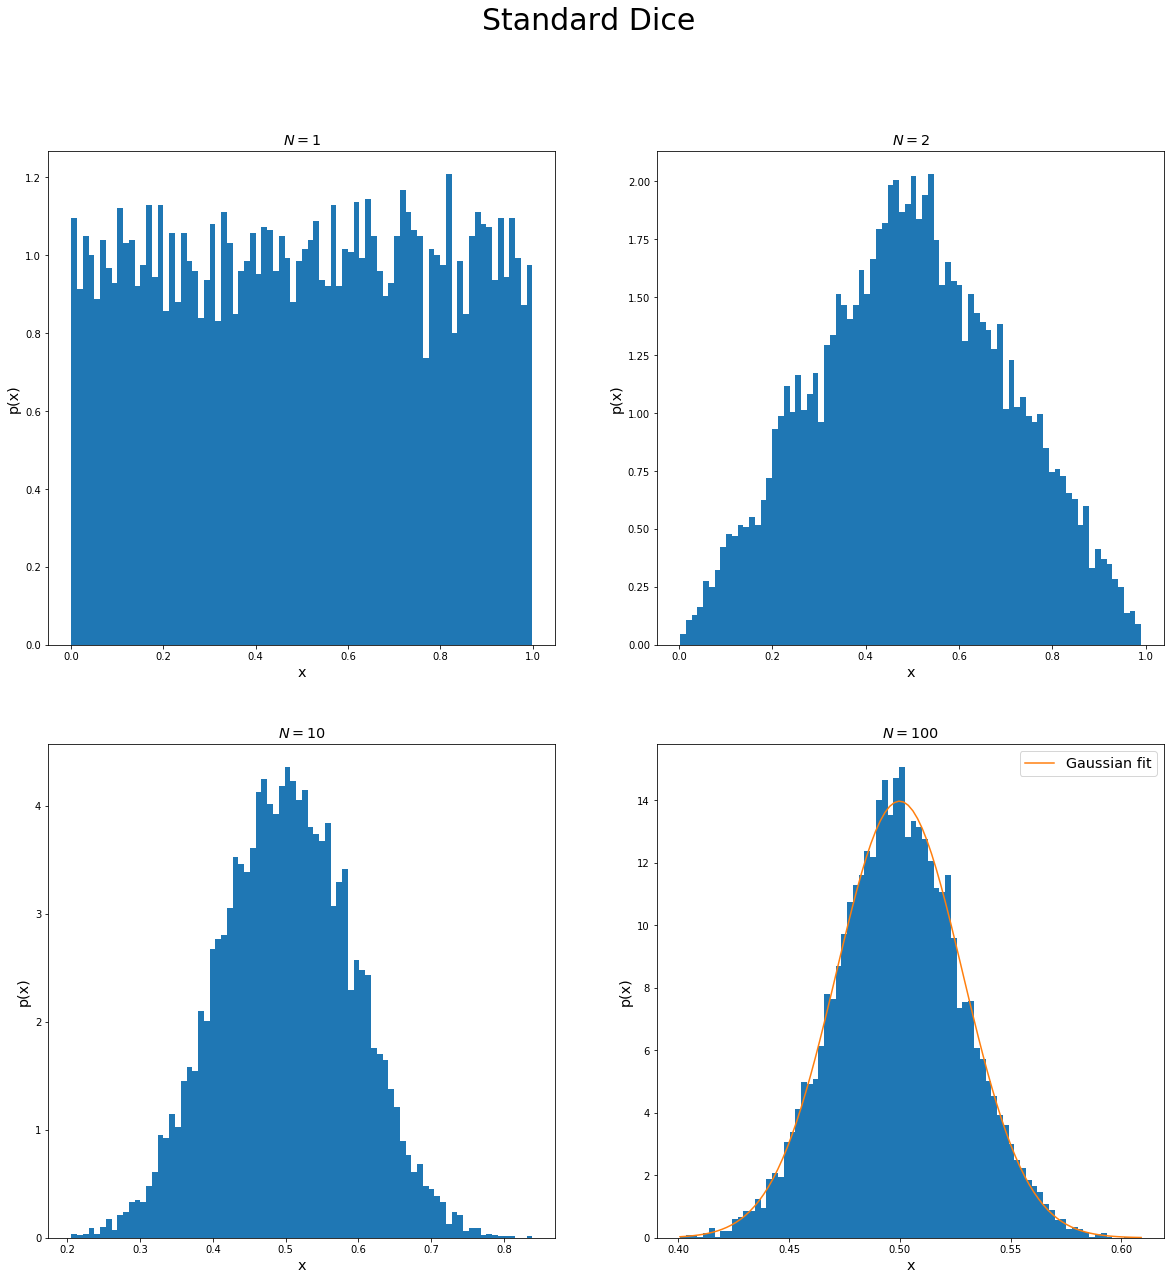

In [10]:
from scipy import stats 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def gauss(x,avg,std):  # defining the fitting function
    return 1.0/np.sqrt(2*np.pi*(std**2))*np.exp(-0.5*(x-avg)**2/(std**2))

y1, y2, y3, y4= np.loadtxt("es01.2/N_un.txt", usecols=(0,1,2,3), unpack='true')

f, axarr = plt.subplots(2,2,figsize=(20,20))
f.subplots_adjust(hspace=0.2, wspace=0.2)

avg,std = stats.norm.fit(y4)
x = np.linspace(np.min(y4),np.max(y4),100)
axarr[0, 0].hist(y1, 80, density='true')
axarr[0, 0].set_title(r'$N=1$',fontsize='x-large')
axarr[0, 0].set_xlabel('x', fontsize='x-large')
axarr[0, 0].set_ylabel('p(x)', fontsize='x-large')

axarr[0, 1].hist(y2, 80, density='true')
axarr[0, 1].set_title(r'$N=2$',fontsize='x-large')
axarr[0, 1].set_xlabel('x', fontsize='x-large')
axarr[0, 1].set_ylabel('p(x)', fontsize='x-large')

axarr[1, 0].hist(y3, 80, density='true')
axarr[1, 0].set_title(r'$N=10$',fontsize='x-large')
axarr[1, 0].set_xlabel('x', fontsize='x-large')
axarr[1, 0].set_ylabel('p(x)', fontsize='x-large')

axarr[1, 1].hist(y4, 80, density='true')
axarr[1, 1].plot(x, gauss(x,avg,std), label='Gaussian fit')
axarr[1, 1].legend(fontsize='x-large')
axarr[1, 1].set_title(r'$N=100$',fontsize='x-large')
axarr[1, 1].set_xlabel('x', fontsize='x-large')
axarr[1, 1].set_ylabel('p(x)', fontsize='x-large')
f.suptitle('Standard Dice',fontsize=30)
plt.show()

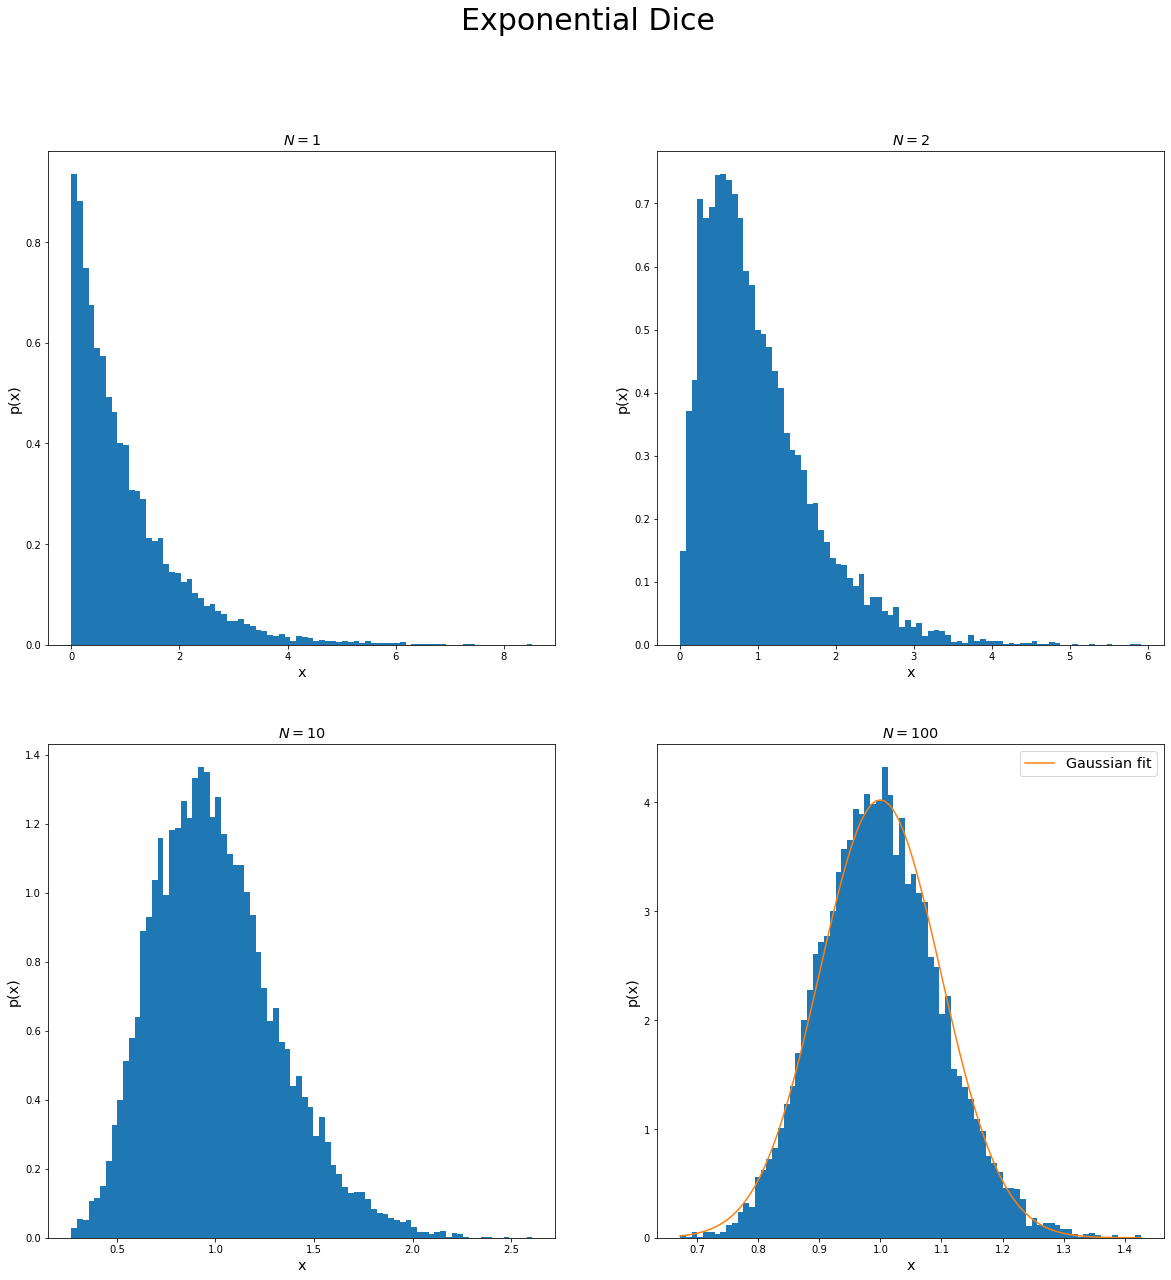

In [11]:
y1, y2, y3, y4= np.loadtxt("es01.2/N_exp.txt", usecols=(0,1,2,3), unpack='true')

f, axarr = plt.subplots(2,2,figsize=(20,20))
f.subplots_adjust(hspace=0.2, wspace=0.2)

avg,std = stats.norm.fit(y4)
x = np.linspace(np.min(y4),np.max(y4),100)
axarr[0, 0].hist(y1, 80, density='true')
axarr[0, 0].set_title(r'$N=1$',fontsize='x-large')
axarr[0, 0].set_xlabel('x', fontsize='x-large')
axarr[0, 0].set_ylabel('p(x)', fontsize='x-large')

axarr[0, 1].hist(y2, 80, density='true')
axarr[0, 1].set_title(r'$N=2$',fontsize='x-large')
axarr[0, 1].set_xlabel('x', fontsize='x-large')
axarr[0, 1].set_ylabel('p(x)', fontsize='x-large')

axarr[1, 0].hist(y3, 80, density='true')
axarr[1, 0].set_title(r'$N=10$',fontsize='x-large')
axarr[1, 0].set_xlabel('x', fontsize='x-large')
axarr[1, 0].set_ylabel('p(x)', fontsize='x-large')

axarr[1, 1].hist(y4, 80, density='true')
axarr[1, 1].plot(x, gauss(x,avg,std), label='Gaussian fit')
axarr[1, 1].legend(fontsize='x-large')
axarr[1, 1].set_title(r'$N=100$',fontsize='x-large')
axarr[1, 1].set_xlabel('x', fontsize='x-large')
axarr[1, 1].set_ylabel('p(x)', fontsize='x-large')
f.suptitle('Exponential Dice',fontsize=30)
plt.show()

Come si può notare la distribuzione della variabile somma, all'aumentare $N$ del numero di Random variabili indipendenti $(x_1,\dots,x_N)$ e identicamente distribuite con valor medio $\langle x_1 \rangle=\dots=\langle x_n\rangle=\mu$ e varianza $\langle x_1^2 \rangle-\langle x_1\rangle^2=\dots=\langle x_N^2 \rangle-\langle x_N \rangle^2=\sigma^2<\infty$, tende a diventare normale. 

Ovvero $P_N(S_N)\rightarrow\frac{1}{\sqrt(2\pi\sigma^2_N}exp\bigg[-\frac{(S_N-\mu N)^2}{2\sigma^2_N}\bigg]$ con $\sigma^2_N=N\sigma^2$ e $\langle S_N\rangle=\mu N$, rispettando così il Teorema del Limite Centrale.

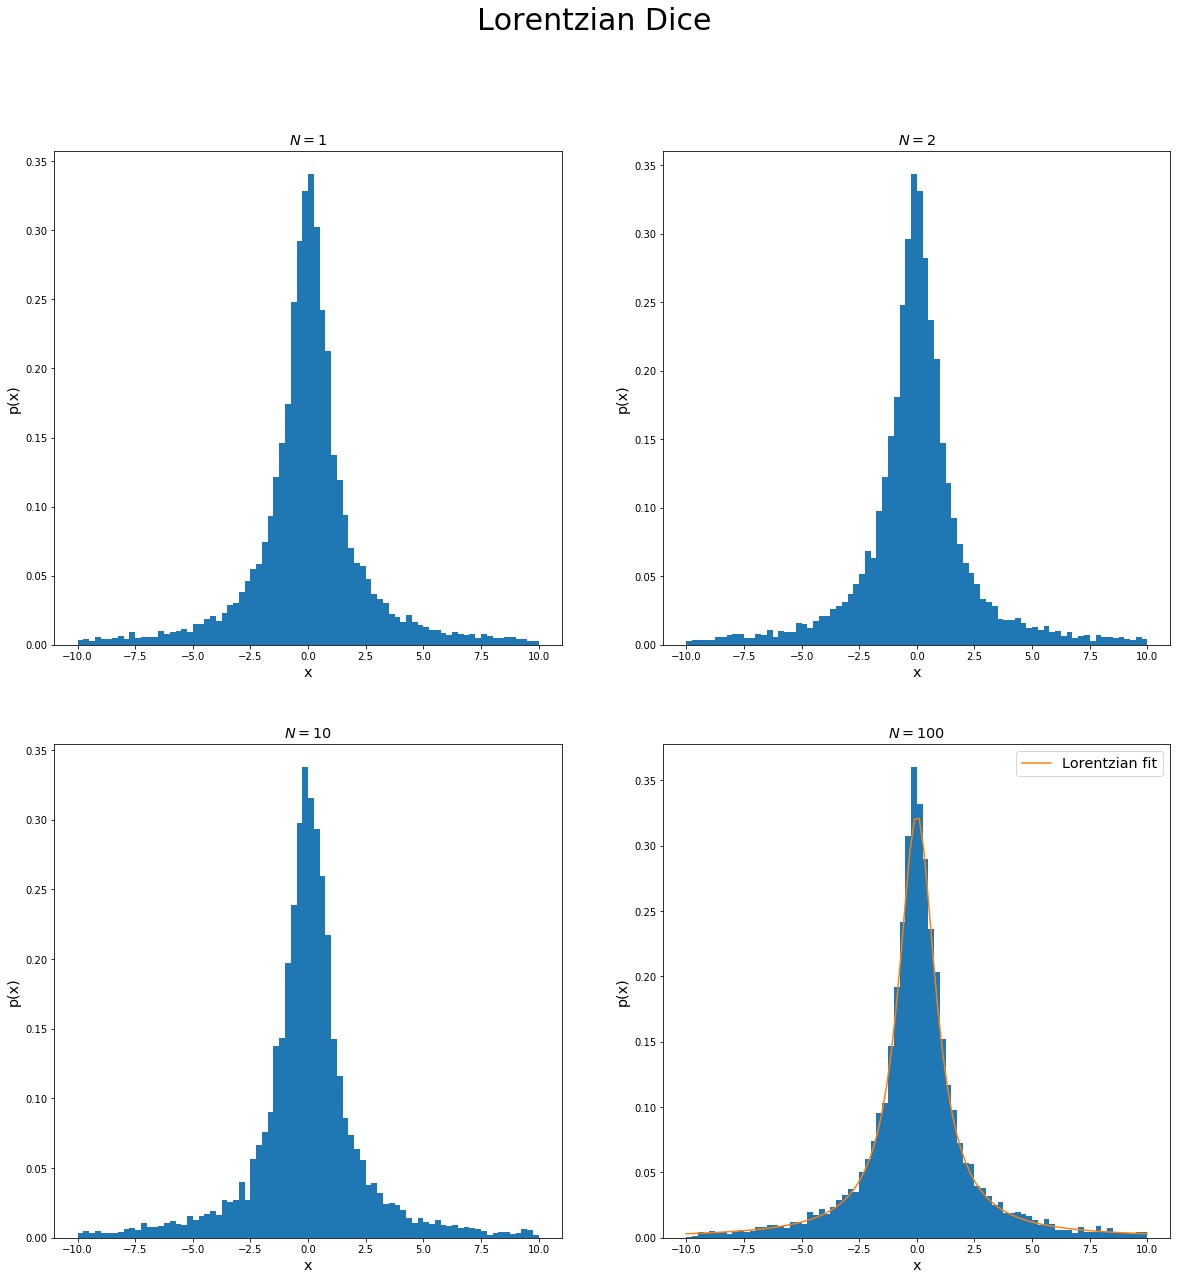

In [12]:
y1, y2, y3, y4= np.loadtxt("es01.2/N_CL.txt", usecols=(0,1,2,3), unpack='true')

f, axarr = plt.subplots(2,2,figsize=(20,20))
f.subplots_adjust(hspace=0.2, wspace=0.2)
def cauchy(x,x0,g):  # defining the fitting function
    return g/(np.pi*((x-x0)**2+g**2))  

x0,g = stats.cauchy.fit(y4)
avg,std = stats.norm.fit(y4)
x = np.linspace(-10,10,100)
axarr[0, 0].hist(y1, 80, range=(-10,10), density='true')
axarr[0, 0].set_title(r'$N=1$',fontsize='x-large')
axarr[0, 0].set_xlabel('x', fontsize='x-large')
axarr[0, 0].set_ylabel('p(x)', fontsize='x-large')

axarr[0, 1].hist(y2, 80, range=(-10,10), density='true')
axarr[0, 1].set_title(r'$N=2$',fontsize='x-large')
axarr[0, 1].set_xlabel('x', fontsize='x-large')
axarr[0, 1].set_ylabel('p(x)', fontsize='x-large')

axarr[1, 0].hist(y3, 80, range=(-10,10), density='true')
axarr[1, 0].set_title(r'$N=10$',fontsize='x-large')
axarr[1, 0].set_xlabel('x', fontsize='x-large')
axarr[1, 0].set_ylabel('p(x)', fontsize='x-large')

axarr[1, 1].hist(y4, 80, range=(-10,10), density='true')
axarr[1, 1].plot(x, cauchy(x, x0, g), label='Lorentzian fit')
axarr[1, 1].legend(fontsize='x-large')
axarr[1, 1].set_title(r'$N=100$',fontsize='x-large')
axarr[1, 1].set_xlabel('x', fontsize='x-large')
axarr[1, 1].set_ylabel('p(x)', fontsize='x-large')
f.suptitle('Lorentzian Dice',fontsize=30)
plt.show()

A differenza delle distribuzioni precendeti, per random variabili distribuite secondo Cauchy-Lorentz, la distribuzione limite di $S_N$ non approccia una gaussiana ma rimane una distribuzione di Cauchy-Lorentz. Infatti tale distribuzione non soddisfa le condizioni del Teorema del Limite Centrale avendo varianza infinita.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

Per simulare l'esperimento di Buffon ho disposto su un piano delle linee orizzontali parallele a distanza $d=1$ l'una dall'altra. La lunghezza dell'ago è stata assunta pari a $L=0.8$. 

Per creare la barretta nel piano ho generato un numero casuale x compreso tra $[0,d/2)$ e tale punto viene considerato come la distanza del centro dell'ago da una linea. Poi ho estratto due numeri casuali $X,Y$ compresi tra $[-1,1)$ e data la condizione $x^2+y^2<1$ ho campionato la distribuzione tra $[0,2\pi)$ nel seguente modo:
$$\theta=2\cos^{-1}\bigg(\frac{x}{\sqrt{x^2+y^2}}\bigg).$$

Ho poi creato il numero $y = (\frac{l}{2}) sin (\theta)$ e se si verifica che x < y incremento il contatore $N_{hit}$. Sfruttando così $$\pi =\frac{2LN_{thr}}{N_{hit}d}$$ per grandi $N_{thr}$ ottengo con buona approssimazione il valore di $\pi$ (senza fare ricorso all'uso di $\pi$ nel codice).

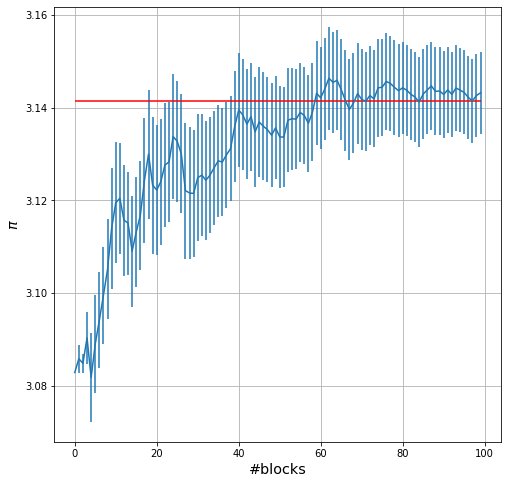

In [15]:
x, mean, dev_std = np.loadtxt("./es01.3/pigreco.txt", usecols=(0,1,2), unpack='true')
x = x/1000
plt.figure(figsize=(8,8))
plt.errorbar(x,mean,yerr=dev_std)
plt.xlabel('#blocks',fontsize='x-large')
plt.ylabel('$\pi$',fontsize='x-large')
plt.grid(True)
plt.hlines(y=3.1415,xmin=min(x), xmax=max(x),color='r', linestyle='-')

plt.show()